# WeatherPy

In [1]:
# Dependencies
import json
import requests
import pandas as pd
import numpy as np
import time
from scipy.stats import linregress
import random
import matplotlib.pyplot as plt

# Import API Key
from config import api_key

In [2]:
# Import citipy to locate city using lat an lng
from citipy import citipy

In [3]:
# Create lists to hold lat_lng & cities
lats_lngs = []
cities = []

In [4]:
# Set a range of lat and long
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
# Set a random range of lat and long
latitudes = np.random.uniform(lat_range[0], lat_range[1], size = 1500)
longitudes = np.random.uniform(lng_range[0], lng_range[1], size = 1500)

# Pair latitudes and longtitudes together in a tuple 
lats_lngs = zip(latitudes,longitudes)

### Generate Cities List
Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.

In [6]:
# loop to get list of cities
for coordinates in lats_lngs:
    # Create request to pull a city with coordinates using citipy
    try: 
        city = citipy.nearest_city(coordinates[0], coordinates[1]).city_name
        # Add city to cities list if unique
        if city not in cities:
            cities.append(city)
    except: 
        print('City not found')
            
# Confirm number of cities > 500       
print(len(cities))

608


### Perform API Calls

- Perform a weather check on each city using a series of successive API calls.
- Include a print log of each city as it'sbeing processed (with the city number and city name).

In [7]:
# Save URL for OpenWeather API
url = "http://api.openweathermap.org/data/2.5/weather?"
# Set units to F
units = "imperial"
# Save URL with query keywords via api documentation
query_url = f"{url}appid={api_key}&units={units}&q="

In [8]:
# Create lists for weather check
temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
city_list = []
lat_list = []
lng_list = []
country_list = []
date_list = []

# Keep track of response counters
record = 0
set_r = 1

# Print initial statement
print('''
-----------------------------
Beginning Data Retrieval
-----------------------------''')

# Loop to add data to lists and call API for each city
for city in cities:
    try:
        # Call API
        response = requests.get(query_url + city.replace(" ","&"))
        # If response is successful, convert response to json
        if response.status_code == 200:
            response = response.json()
            # Add data from json to lists
            temp_list.append(response['main']['temp_max'])
            humidity_list.append(response['main']['humidity'])
            cloudiness_list.append(response['clouds']['all'])
            wind_speed_list.append(response['wind']['speed'])
            lat_list.append(response['coord']['lat'])
            lng_list.append(response['coord']['lon'])
            country_list.append(response['sys']['country'])
            date_list.append(response['dt'])
            # If record count is greater than 48, set the record back to 1, add a set and append city to city list
            if record > 48:
                record = 1
                set_r += 1
                city_list.append(city)
            # Else keep adding records within the set and append city to city list
            else:
                record += 1
                city_list.append(city)        
            
            print(f"Processing Record {record} of Set {set_r} | {city}")
        else: 
            print("City not found. Skipping...") 
    except Exception as e:
        print("Something went wrong...")
print('''
-----------------------------
Data Retrival Complete
-----------------------------''')


-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | salta
Processing Record 7 of Set 1 | vestmanna
Processing Record 8 of Set 1 | qostanay
Processing Record 9 of Set 1 | burnie
City not found. Skipping...
Processing Record 10 of Set 1 | codrington
Processing Record 11 of Set 1 | pacific grove
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | tuatapere
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | norman wells
Processing Record 17 of Set 1 | ancud
Processing Record 18 of Set 1 | ponta do sol
City not found. Skipping...
Processing Record 19 of Set 1 | rio grande
Processing Record 20 of Set 1 | teya
City not found. Skipping...
Proces

City not found. Skipping...
Processing Record 40 of Set 4 | ahipara
Processing Record 41 of Set 4 | bat khela
Processing Record 42 of Set 4 | brownsville
Processing Record 43 of Set 4 | sanchor
Processing Record 44 of Set 4 | coahuayana
Processing Record 45 of Set 4 | ostrovnoy
Processing Record 46 of Set 4 | ambulu
Processing Record 47 of Set 4 | viedma
Processing Record 48 of Set 4 | warrenton
Processing Record 49 of Set 4 | ilulissat
Processing Record 1 of Set 5 | otane
Processing Record 2 of Set 5 | phan rang
Processing Record 3 of Set 5 | ocampo
Processing Record 4 of Set 5 | okha
Processing Record 5 of Set 5 | mastic beach
Processing Record 6 of Set 5 | kamenka
Processing Record 7 of Set 5 | namatanai
Processing Record 8 of Set 5 | aguimes
Processing Record 9 of Set 5 | mackay
Processing Record 10 of Set 5 | sterling
Processing Record 11 of Set 5 | vitoria da conquista
Processing Record 12 of Set 5 | clyde river
Processing Record 13 of Set 5 | khatanga
Processing Record 14 of Set

Processing Record 27 of Set 8 | camabatela
Processing Record 28 of Set 8 | marsa matruh
Processing Record 29 of Set 8 | cervo
Processing Record 30 of Set 8 | mae hong son
Processing Record 31 of Set 8 | high rock
Processing Record 32 of Set 8 | pathein
Processing Record 33 of Set 8 | ukiah
Processing Record 34 of Set 8 | bentiu
Processing Record 35 of Set 8 | severomuysk
Processing Record 36 of Set 8 | selestat
Processing Record 37 of Set 8 | arkhara
Processing Record 38 of Set 8 | namibe
City not found. Skipping...
Processing Record 39 of Set 8 | blatec
Processing Record 40 of Set 8 | vardo
Processing Record 41 of Set 8 | alihe
Processing Record 42 of Set 8 | mitu
Processing Record 43 of Set 8 | sorland
Processing Record 44 of Set 8 | rosario
Processing Record 45 of Set 8 | keti bandar
Processing Record 46 of Set 8 | zaysan
City not found. Skipping...
Processing Record 47 of Set 8 | north platte
Processing Record 48 of Set 8 | angoche
Processing Record 49 of Set 8 | kargasok
Processin

### Convert Raw Data to DataFrame
- Export the city data into a .csv.
- Display the DataFrame

In [9]:
# Create dictionary  
weather_dict = {
    "City":city_list,
    "Lat":lat_list,
    "Lng":lng_list,
    "Max Temp":temp_list,
    "Humidity":humidity_list,
    "Cloudiness":cloudiness_list,
    "Wind Speed":wind_speed_list,
    "Country":country_list,
    "Date":date_list,   
}
# Create dataframe
city_weather = pd.DataFrame(weather_dict)

# Export data via csv
city_weather.to_csv("City_Weather.csv", header=True, encoding = 'utf-8', index = False)
city_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,70.88,67,25,5.03,PF,1627246667
1,puerto ayora,36.5939,-6.2330,75.31,80,0,17.27,ES,1627246763
2,ushuaia,-54.8000,-68.3000,37.06,75,40,20.71,AR,1627246679
3,jamestown,42.0970,-79.2353,84.09,54,20,9.22,US,1627246555
4,georgetown,5.4112,100.3354,82.89,86,20,1.99,MY,1627246413


### Plotting the Data
- Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
- Save the plotted figures as .pngs.

#### Latidude  vs. Temperature (F) Plot

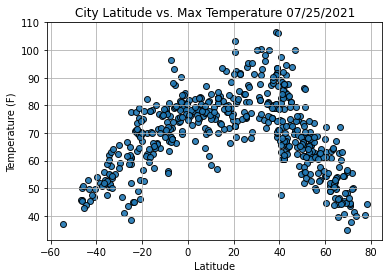

<Figure size 432x288 with 0 Axes>

In [10]:
# Create scatter plot using matplotlib
plt.scatter(city_weather['Lat'],city_weather['Max Temp'], 
            marker='o', edgecolor = 'black', alpha=0.9, label = 'Cities')
# Add labels to plot
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
plt.show()

# Save figure
plt.savefig("City_Latitude_vs._Max_Temperature.png");

Looking at the graph, temperatures increase the nearer a city is distanced to the equator (0° Latitude). Likewise, temperatures also decrease the further city is distanced from the equator.

#### Latitude vs. Humidity Plot

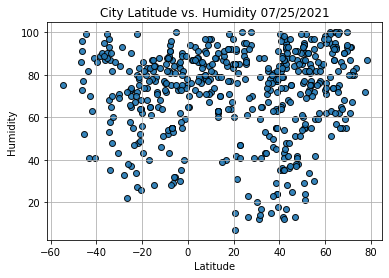

<Figure size 432x288 with 0 Axes>

In [11]:
# Create scatter plot using matplotlib
plt.scatter(city_weather['Lat'],city_weather['Humidity'], 
            marker='o', edgecolor = 'black', alpha=0.9, label = 'Cities')
# Add labels to plot
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(True)
plt.show()

# Save figure
plt.savefig("City_Latitude_vs._Humidity.png");

Looking at the graph, there does not appear to be a strong relationship, or correlation, between humidity and latitude. These two variables do not appear to affect each other.

#### Latitude vs. Cloudiness Plot

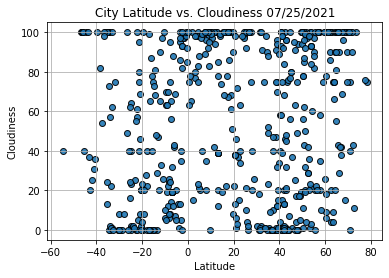

<Figure size 432x288 with 0 Axes>

In [12]:
# Create scatter plot using matplotlib
plt.scatter(city_weather['Lat'],city_weather['Cloudiness'], 
            marker='o', edgecolor = 'black', alpha=0.9, label = 'Cities')
# Add labels to plot
plt.title(f'City Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid(True)
plt.show()

# Save figure
plt.savefig("City_Latitude_vs._Cloudiness.png");

Looking at the graph, there does not appear to be a strong relationship, or correlation, between the horizontal extent of clouds and latitude. These two variables do not appear to affect each other.

#### Latitude vs. Wind Speed Plot

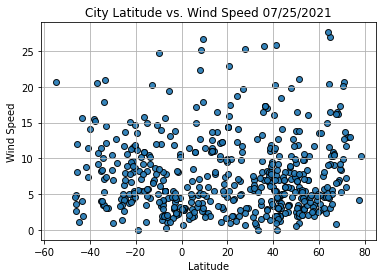

<Figure size 432x288 with 0 Axes>

In [13]:
# Create scatter plot using matplotlib
plt.scatter(city_weather['Lat'],city_weather['Wind Speed'], 
            marker='o', edgecolor = 'black', alpha=0.9, label = 'Cities')
# Add labels to plot
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid(True)
plt.show()

# Save figure
plt.savefig("City_Latitude_vs._Wind Speed.png");

Looking at the graph, there does not appear to be a strong correlation, between wind speed and latitude. These two variables do not appear to affect each other.

#### Linear Regression

In [14]:
# Segment city_weather dataframe into northern and southern hemisphere 
north = city_weather[(city_weather['Lat'] >= 0)]
south = city_weather[(city_weather['Lat'] <= 0)]

In [15]:
# Use function to perform linear regression
def regression(x_values, y_values, yaxis): 
    # Linear regression model
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values, y_values, color="purple")
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(yaxis)
    marker_size=20
    plt.show()
    
    # Print r value
    print(f"The r-value is: {rvalue}")

#### Northern Hemisphere - Temperature (F) vs. Latitude

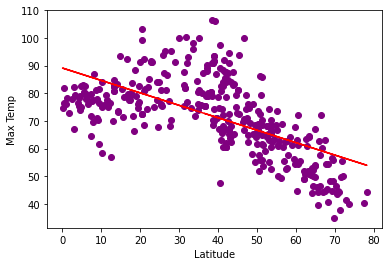

The r-value is: -0.6265998563497792


<Figure size 432x288 with 0 Axes>

In [16]:
# Run linear regression 
x_values = north['Lat']
y_values = north['Max Temp']
regression(x_values,y_values, 'Max Temp')
# Save png
plt.savefig("Northern_Temp_vs_Lat")

#### Southern Hemisphere - Temperature (F) vs. Latitude

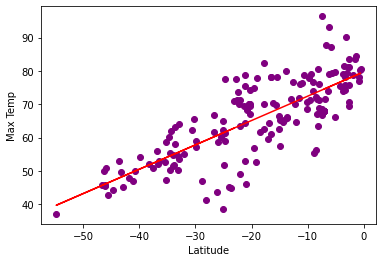

The r-value is: 0.783361668225396


<Figure size 432x288 with 0 Axes>

In [17]:
# Run linear regression 
x_values = south['Lat']
y_values = south['Max Temp']
regression(x_values,y_values, 'Max Temp')
# Save png
plt.savefig("Southern_Temp_vs_Lat")

Temperature and Latitude have a positive relationship in the Southern Hemisphere- as a city's latitude increases, its temperature does as well. In the Northern Hemisphere, Temperature and Latutitude have a negative relationship- as a cities latutitude decreases, temperature also decreases. Lat and temp are strongly correlated in both hemispheres. The Northern Hemisphere has a slightly smaller r-squared value than the Southern Hemisphere. This means that there is a slightly higher percentage of variance in the Northern Hemisphere, and likely due to the fact that 3x more cities are located North of the Equator in the dataset.

#### Northern Hemisphere - Humidity (%) vs. Latitude

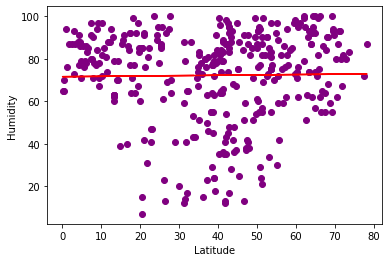

The r-value is: 0.015293682998224133


<Figure size 432x288 with 0 Axes>

In [18]:
# Run linear regression 
x_values = north['Lat']
y_values = north['Humidity']
regression(x_values,y_values, 'Humidity')
# Save png
plt.savefig("Northern_Temp_vs_Humidity")

#### Southern Hemisphere - Humidity (%) vs. Latitude

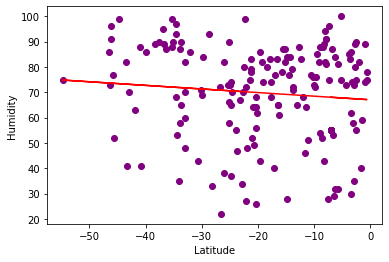

The r-value is: -0.09849484288849363


<Figure size 432x288 with 0 Axes>

In [19]:
x_values = south['Lat']
y_values = south['Humidity']
regression(x_values,y_values, 'Humidity')
# Save png
plt.savefig("Southern_Temp_vs_Humidity")

Temperature and Humidity do not have a strong correlation in either Hemisphere. The fit is weak and there are a large number of major outliers in the dataset. 

#### Northern Hemisphere - Cloudiness (%) vs. Latitude

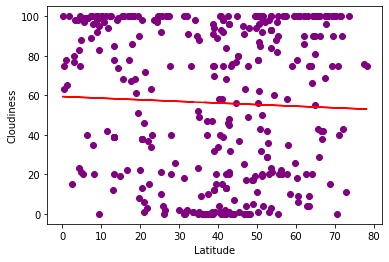

The r-value is: -0.04110313364738283


<Figure size 432x288 with 0 Axes>

In [20]:
# Run linear regression 
x_values = north['Lat']
y_values = north['Cloudiness']
regression(x_values,y_values, 'Cloudiness')
# Save png
plt.savefig("Northern_Temp_vs_Cloudiness")

#### Southern Hemisphere - Cloudiness (%) vs. Latitude

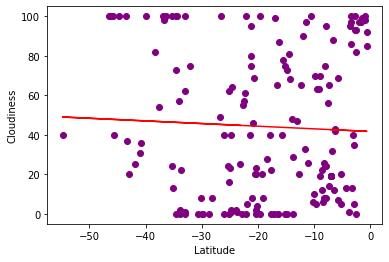

The r-value is: -0.0467332731372305


<Figure size 432x288 with 0 Axes>

In [21]:
# Run linear regression 
x_values = south['Lat']
y_values = south['Cloudiness']
regression(x_values,y_values, 'Cloudiness')
# Save png
plt.savefig("Southern_Temp_vs_Cloudiness")

Temperature and Cloud Cover do not have a strong correlation in either Hemisphere. The fit is weak and there are a large number of major outliers in the dataset. 

#### Northern Hemisphere - Wind Speed (mph) vs. Latitude

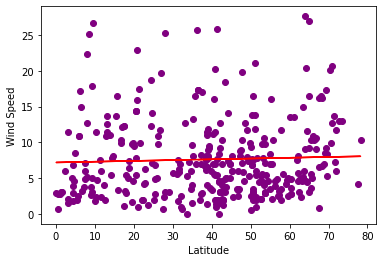

The r-value is: 0.03963510376488963


<Figure size 432x288 with 0 Axes>

In [22]:
# Run linear regression 
x_values = north['Lat']
y_values = north['Wind Speed']
regression(x_values,y_values, 'Wind Speed')
# Save png
plt.savefig("Northern_Temp_vs_Wind Speed")

#### Southern Hemisphere - Wind Speed (mph) vs. Latitude

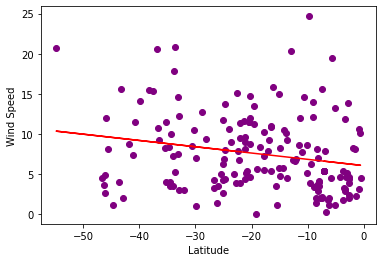

The r-value is: -0.21271244856505098


<Figure size 432x288 with 0 Axes>

In [23]:
# Run linear regression 
x_values = south['Lat']
y_values = south['Wind Speed']
regression(x_values,y_values, 'Wind Speed')
# Save png
plt.savefig("Southern_Temp_vs_Wind Speed")

Temperature and Wind Speed do not have a strong correlation in either Hemisphere. The fit is weak and there are a large number of major outliers in the dataset. 